# Stock Trend Predictor
__Juan Javier Arosemena__
## Result Analisys
Now that the 150 models have been trained and evaluated, we can identify those that performed the best and compare them to Saahil Madge's models in his report.

In [1]:
import os
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from statistics import mean, mode, median, stdev

In [2]:
# Read all results files

results = []
results_dir = 'results/'

for result in os.listdir(results_dir):
    file = os.path.join(results_dir, result)
    if os.path.isfile(file):
        results.append(pd.read_csv(file))

results = pd.concat(results)


# Rename columns and give structure

results.columns = ['_', 'model', 'accuracy', 'false_positives', 'false_negatives']
results.drop(columns=['_'], inplace=True)
results.insert(loc=1, column='n2', value=[int(row.split('-')[2]) for row in results['model']])
results.insert(loc=1, column='n1', value=[int(row.split('-')[1]) for row in results['model']])
results.insert(loc=1, column='prediction_range', value=[int(row.split('-')[0]) for row in results['model']])
results.sort_values(['prediction_range', 'n1', 'n2'], inplace=True)
results.reset_index(drop=True, inplace=True)

In [3]:
# This is the hardcoded results string in Madge's paper (copied and pasted from PDF).

to_fix = ['''0.503945 0.508632 0.532537 0.471448
5 10 0.501211 0.501992 0.552457 0.468792
5 20 0.504179 0.507968 0.547145 0.463479
5 90 0.505273 0.508632 0.544489 0.463479
5 270 0.503828 0.507304 0.545817 0.459495
10 5 0.499253 0.496658 0.532086 0.467914
10 10 0.494571 0.494024 0.556441 0.456839
10 20 0.494336 0.498008 0.545817 0.455511
10 90 0.495508 0.499336 0.543161 0.438247
10 270 0.498477 0.498008 0.540505 0.456839
20 5 0.502909 0.503388 0.536585 0.471545
20 10 0.498971 0.500000 0.557201 0.464334
20 20 0.502578 0.505976 0.540505 0.443559
20 90 0.499258 0.496016 0.543161 0.455511
20 270 0.504726 0.511952 0.543161 0.456839
90 5 0.500925 0.502246 0.532934 0.453593
90 10 0.500568 0.502229 0.540862 0.453195
90 20 0.499871 0.500732 0.543192 0.452416
90 90 0.498984 0.495352 0.543161 0.456839
90 270 0.503711 0.504648 0.543161 0.456839
270 5 0.502712 0.509221 0.561475 0.461066
270 10 0.495168 0.498986 0.553753 0.430020
270 20 0.501696 0.501988 0.554672 0.425447
270 90 0.500616 0.496510 0.541012 0.441536
270 270 0.503437''', ''' 0.523757 0.530708 0.618158 0.411215
5 10 0.525053 0.530040 0.588785 0.452603
5 20 0.528548 0.534713 0.579439 0.403204
5 90 0.526310 0.529372 0.592790 0.401869
5 270 0.530001 0.538051 0.598131 0.401869
10 5 0.524984 0.524194 0.598118 0.419355
10 10 0.521872 0.528037 0.588785 0.427236
10 20 0.521165 0.528037 0.590120 0.403204
10 90 0.515668 0.527370 0.596796 0.404539
10 270 0.525563 0.534045 0.599466 0.404539
20 5 0.531215 0.532698 0.588556 0.435967
20 10 0.527700 0.535183 0.587280 0.441137
20 20 0.533103 0.535381 0.610147 0.419226
20 90 0.531061 0.536716 0.612817 0.380507
20 270 0.540642 0.547397 0.612817 0.385848
90 5 0.528792 0.526355 0.602410 0.403614
90 10 0.525763 0.528401 0.596413 0.445441
90 20 0.532617 0.536819 0.625920 0.387334
90 90 0.529765 0.536048 0.598131 0.401869
90 270 0.532828 0.546061 0.588785 0.401869
270 5 0.548311 0.549587 0.607438 0.479339
270 10 0.548178''', '''0.549275 0.552104 0.607214 0.446894
270 90 0.534736 0.549209 0.604569 0.363796
270 270 0.540603''', '''0.537200 0.540323 0.596774 0.452957
5 10 0.539295 0.545027 0.602151 0.440860
5 20 0.540283 0.545027 0.618280 0.375000
5 90 0.540006 0.542339 0.610215 0.361559
5 270 0.543683 0.548387 0.607527 0.376344
10 5 0.536058 0.540595 0.595399 0.441137
10 10 0.534472 0.549059 0.607527 0.438172
10 20 0.535421 0.545699 0.622312 0.372312
10 90 0.533286 0.538978 0.623656 0.380376
10 270 0.544711 0.547715 0.603495 0.412634
20 5 0.539377 0.544582 0.620027 0.441701
20 10 0.540030 0.542234 0.632153 0.420981
20 20 0.540560 0.545699 0.650538 0.381720
20 90 0.541469 0.550403 0.618280 0.369624
20 270 0.550166 0.555108 0.662634 0.373656
90 5 0.539097 0.545524 0.603945 0.435508
90 10 0.535746 0.537651 0.620482 0.405120
90 20 0.535477 0.550445 0.637982 0.341246
90 90 0.540639 0.545699 0.622312 0.380376
90 270 0.539097 0.548387 0.615591 0.357527
270 5 0.559069 0.557411 0.653445 0.427975
270 10 0.556089 0.557851 0.652893 0.407025
270 20 0.568052 0.571862 0.663968 0.374494
270 90 0.549645 0.559397 0.643617 0.347518
270 270 0.543169''', ''' 0.553775 0.559946 0.658038 0.336512
5 10 0.555658 0.566757 0.668937 0.331063
5 20 0.550809 0.555177 0.686649 0.325613
5 90 0.546642 0.564033 0.663488 0.325613
5 270 0.568040 0.580381 0.653951 0.335150
10 5 0.549827 0.551440 0.663923 0.336077
10 10 0.557020 0.566757 0.688011 0.325613
10 20 0.545560 0.555858 0.688011 0.324251
10 90 0.545560 0.560627 0.664850 0.324251
10 270 0.575373 0.581063 0.713896 0.322888
20 5 0.554365 0.556328 0.671766 0.321280
20 10 0.554802 0.558011 0.680939 0.325967
20 20 0.548325 0.556540 0.697548 0.324251
20 90 0.550128 0.574932 0.678474 0.324251
20 270 0.567879 0.580381 0.664850 0.299728
90 5 0.548491 0.565485 0.677966 0.302003
90 10 0.552303 0.566514 0.689602 0.307339
90 20 0.547263 0.564006 0.697289 0.311747
90 90 0.546281 0.568801 0.667575 0.324251
90 270 0.555698 0.577657 0.653951 0.324251
270 5 0.572871 0.575693 0.705757 0.353945
270 10 0.578369 0.580169 0.708861 0.373418
270 20 0.573955 0.586777 0.714876 0.342975
270 90 0.561319 0.596570 0.709386 0.296029
270 270 0.570724''', '''0.555679 0.570030 0.849398 0.251506
5 10 0.554571 0.545934 0.849398 0.256024
5 20 0.550053 0.551205 0.849398 0.222892
5 90 0.492470 0.491717 0.849398 0.203313
5 270 0.572821 0.602410 0.814759 0.161145
10 5 0.551415 0.562974 0.848255 0.239757
10 10 0.565556 0.574548 0.849398 0.236446
10 20 0.567328 0.588102 0.849398 0.201807
10 90 0.497387 0.520331 0.849398 0.194277
10 270 0.571536 0.597139 0.774096 0.165663
20 5 0.549760 0.566256 0.852080 0.221880
20 10 0.556845 0.563456 0.847095 0.244648
20 20 0.570030 0.571536 0.849398 0.225904
20 90 0.501329 0.516566 0.849398 0.167169
20 270 0.577826 0.617470 0.796687 0.118976
90 5 0.498324 0.524180 0.911917 0.138169
90 10 0.504684 0.517123 0.912671 0.160959
90 20 0.512280 0.520202 0.910774 0.173401
90 90 0.495748 0.496988 0.849398 0.240964
90 270 0.555679 0.576807 0.774096 0.259036
270 5 0.614993 0.585213 0.939850 0.258145
270 10 0.605926 0.602723 0.893564 0.118812
270 20 0.604149 0.608696 0.915459 0.200483
270 90 0.598991 0.596074 0.911157 0.123967
270 270 0.571580''', ''' 0.392076 0.331612 0.983471 0.000000
5 10 0.390010 0.321281 0.985537 0.000000
5 20 0.403804 0.376033 0.987603 0.000000
5 90 0.389645 0.297521 0.971074 0.000000
5 270 0.517076 0.482438 0.987603 0.010331
10 5 0.397765 0.354906 0.987474 0.000000
10 10 0.398213 0.354339 0.987603 0.000000
10 20 0.408483 0.372934 0.987603 0.000000
10 90 0.399003 0.317149 0.971074 0.000000
10 270 0.514463 0.488636 0.987603 0.010331
20 5 0.406434 0.373134 0.982942 0.006397
20 10 0.415488 0.360759 0.985232 0.000000
20 20 0.421123 0.387397 0.987603 0.000000
20 90 0.413345 0.359504 0.971074 0.000000
20 270 0.521269 0.491736 0.987603 0.022727
90 5 0.444788 0.408521 1.000000 0.007519
90 10 0.449840 0.474010 1.000000 0.000000
90 20 0.461921 0.457729 0.997585 0.002415
90 90 0.432547 0.358471 0.971074 0.004132
90 270 0.526434 0.534091 0.987603 0.002066
270 5 0.691244 0.705479 1.000000 0.027397
270 10 0.687763 0.732143 1.000000 0.035714
270 20 0.675214 0.713675 1.000000 0.047009
270 90 0.674632 0.731908 1.000000 0.111842
270 270 0.568000''']

to_fix = [string.replace('\n', ' ') for string in to_fix]

to_fix = [string.split()[::6] for string in to_fix] # Selecting the mean field in every row

madge_means = [] 

for lists in to_fix:
    for string in lists:
        madge_means.append(float(string))

results.insert(loc=5, column='madge_mean', value=madge_means)

### Top results
The top scoring models almost hit the 90% prediction accuracy score, beating all of the models with equal parameters in Madge's paper. In adition, all of Madge's top performing models are outperformed in accuracy by our trained models with equal parameters as well.

In [37]:
results.sort_values('accuracy', ascending=False).head(10)

,model,prediction_range,n1,n2,accuracy,madge_mean,false_positives,false_negatives
141,270-90-10,270,90,10,0.898103,0.449840,1069,0
140,270-90-5,270,90,5,0.898103,0.444788,1069,0
138,270-20-90,270,20,90,0.898103,0.413345,1069,0
128,270-5-90,270,5,90,0.898103,0.389645,1069,0
142,270-90-20,270,90,20,0.898103,0.461921,1069,0
133,270-10-90,270,10,90,0.898103,0.399003,1069,0
143,270-90-90,270,90,90,0.898103,0.432547,1069,0
144,270-90-270,270,90,270,0.874204,0.526434,731,0
139,270-20-270,270,20,270,0.874204,0.521269,731,0
129,270-5-270,270,5,270,0.874204,0.517076,731,0


In [36]:
results.sort_values('madge_mean', ascending=False).head(10)

,model,prediction_range,n1,n2,accuracy,madge_mean,false_positives,false_negatives
145,270-270-5,270,270,5,0.874204,0.691244,731,0
146,270-270-10,270,270,10,0.874204,0.687763,731,0
147,270-270-20,270,270,20,0.874204,0.675214,731,0
148,270-270-90,270,270,90,0.874204,0.674632,731,0
120,90-270-5,90,270,5,0.843332,0.614993,1277,0
121,90-270-10,90,270,10,0.843332,0.605926,1277,0
122,90-270-20,90,270,20,0.843332,0.604149,1277,0
123,90-270-90,90,270,90,0.843332,0.598991,1277,0
96,20-270-10,20,270,10,0.682513,0.578369,1787,1098
114,90-20-270,90,20,270,0.843332,0.577826,1277,0


The following cell plots a graph comparing every trained model's accuracy against Madge's. 

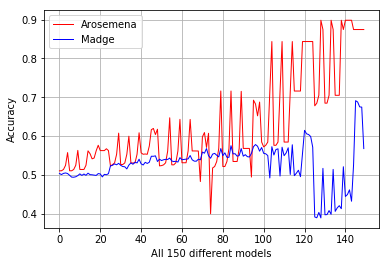

In [42]:
# Create and plot a linegraph

y_1 = results['accuracy'].values.tolist()
x_1 = range(len(y_1))
y_2 = results['madge_mean'].values.tolist()
x_2 = range(len(y_2))

plt.grid()
plt.plot(x_1, y_1, 'r', linewidth=1.0, label='Arosemena')
plt.plot(x_2, y_2, 'b', linewidth=1.0, label='Madge')
plt.xlabel('All 150 different models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Only few of our trained models are outperformed by their respective model in Madge's paper. There is a common trend in between models' accuracies as parameters grow. However, it can be noticed that the accuracies diverge heavily for much longer prediction periods; Madge's accuracies drop while our models accuracies grow.

The cell below plots every model's accuracy comparison. The accuracy discrepancy is more noticeable for larger ``t`` and ``n1``

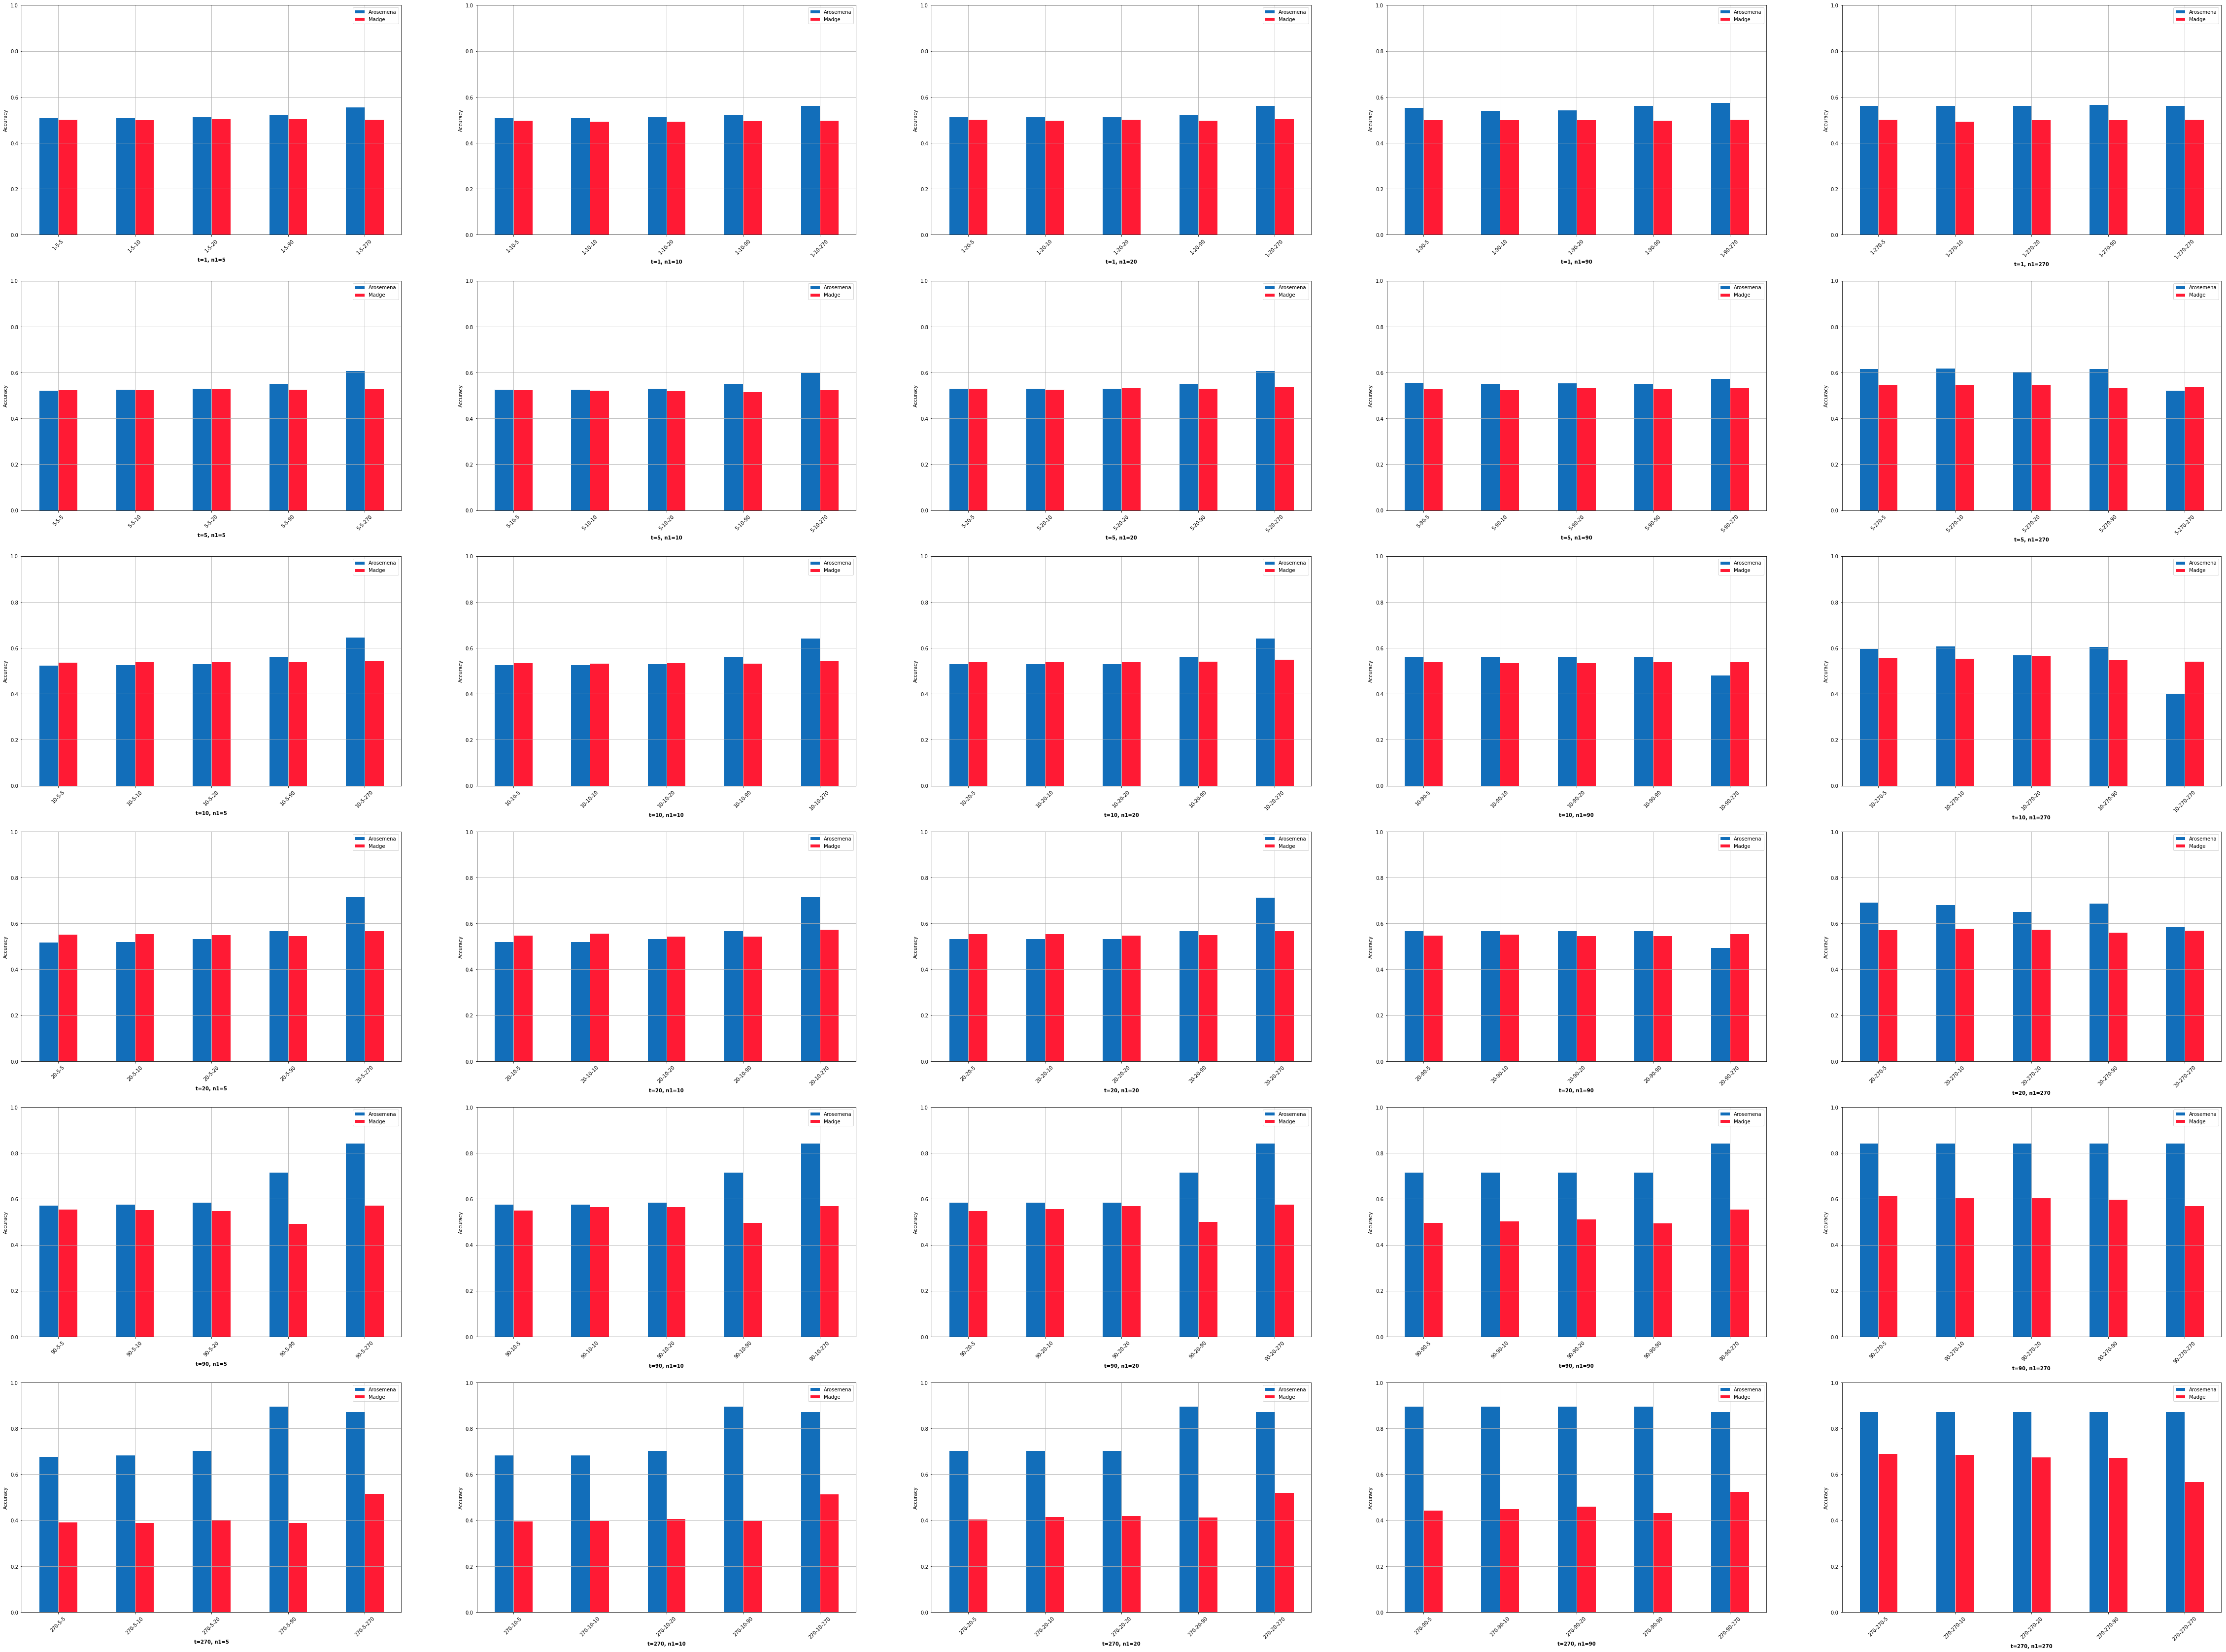

In [32]:
# Graph every model's performance comparison, grouped by prediction period 't' and stock data period 'n1'

barWidth = 0.25
bars1 = [results.iloc[i]['accuracy'] for i in range(len(results))]
bars2 = [results.iloc[i]['madge_mean'] for i in range(len(results))]
models = [results.iloc[i]['model'] for i in range(len(results))]
bars1_toplot = []
bars2_toplot = []
models_toplot = []

i=0
j=0
iterations = len(models)

plt.figure(figsize=(80, 60))


while(i<iterations):
    i += 1
    t = models[0].split('-')[0]
    n1 = models[0].split('-')[1]
    bars1_toplot.append(bars1.pop(0))
    bars2_toplot.append(bars2.pop(0))
    models_toplot.append(models.pop(0))
    
    if i%5 == 0 or i == len(models_toplot)-1:
        j += 1
        plt.grid()
        plt.subplot(6,5, j)
        
        # Set position of bar on X axis
        r1 = np.arange(len(bars1_toplot))
        r2 = [x + barWidth for x in r1]

        # Make the plot
        plt.bar(r1, bars1_toplot, color='#126eba', width=barWidth, edgecolor='white', label='Arosemena')
        plt.bar(r2, bars2_toplot, color='#ff1a34', width=barWidth, edgecolor='white', label='Madge')

        # Add xticks on the middle of the group bars
        plt.xlabel(f't={t}, n1={n1}', fontweight='bold', backgroundcolor='#ffffff')
        plt.xticks([r + barWidth/2 for r in range(len(bars1_toplot))], models_toplot, rotation=45, backgroundcolor='#ffffff')
        plt.ylabel('Accuracy', backgroundcolor='#ffffff')
        plt.yticks(backgroundcolor='#ffffff')
        plt.ylim((0,1))

        # Create legend & Show graphic
        plt.legend()
        
        
        bars1_toplot.clear()
        bars2_toplot.clear()
        models_toplot.clear()
plt.show()

In [41]:
# Calculate percentage of model outperformance

percentage = mean([1 if a>b else 0 for (a,b) in zip(y_1, y_2)])
percentage

0.8333333333333334